<a href="https://colab.research.google.com/github/rohitrkt02/Fraud-Detection-in-E-commerce-transaction/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
df.isna().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Device Used'].value_counts()

,count
Device Used,
desktop,7923
mobile,7881
tablet,7830


In [ ]:
df['Is Fraudulent'].value_counts()

,count
Is Fraudulent,
0,22412
1,1222


([<matplotlib.axis.XTick at 0x7c6bff28ecd0>,
 [Text(0, 0, 'Non-Fraud'), Text(1, 0, 'Fraud')])

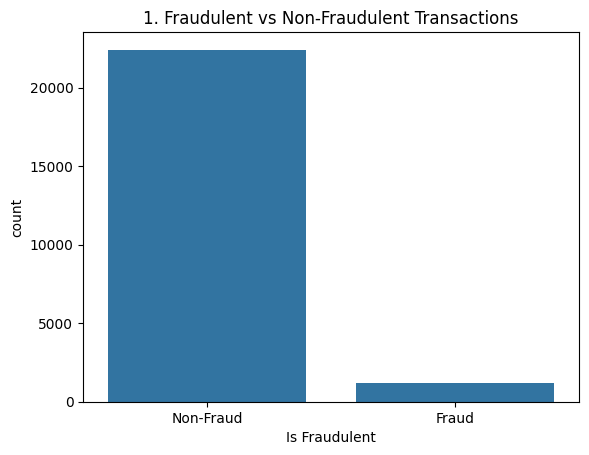

In [ ]:
sns.countplot(x="Is Fraudulent", data=df)
plt.title("1. Fraudulent vs Non-Fraudulent Transactions")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

Text(0.5, 0, 'Transaction Amount')

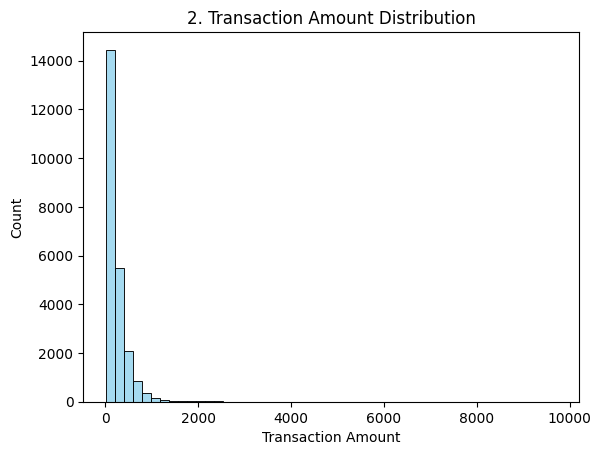

In [ ]:
sns.histplot(df["Transaction Amount"], bins=50, color="skyblue")
plt.title("2. Transaction Amount Distribution")
plt.xlabel("Transaction Amount")

Text(0, 0.5, 'Fraud Rate')

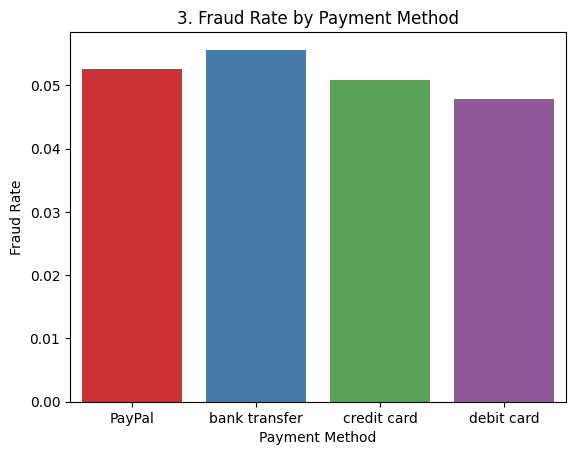

In [ ]:
fraud_by_payment = df.groupby("Payment Method")["Is Fraudulent"].mean()
sns.barplot(x=fraud_by_payment.index, y=fraud_by_payment.values, palette="Set1")
plt.title("3. Fraud Rate by Payment Method")
plt.ylabel("Fraud Rate")

Text(0.5, 0, 'Fraud Rate')

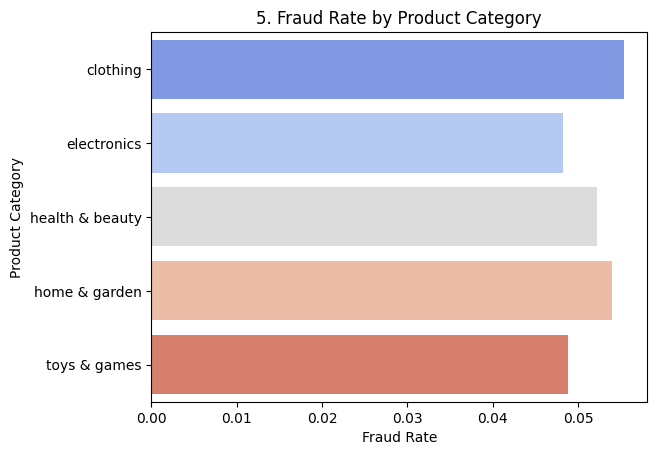

In [ ]:
fraud_by_category = df.groupby("Product Category")["Is Fraudulent"].mean()
sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index, palette="coolwarm")
plt.title("5. Fraud Rate by Product Category")
plt.xlabel("Fraud Rate")

Text(0.5, 1.0, '4. Fraud Rate by Age')

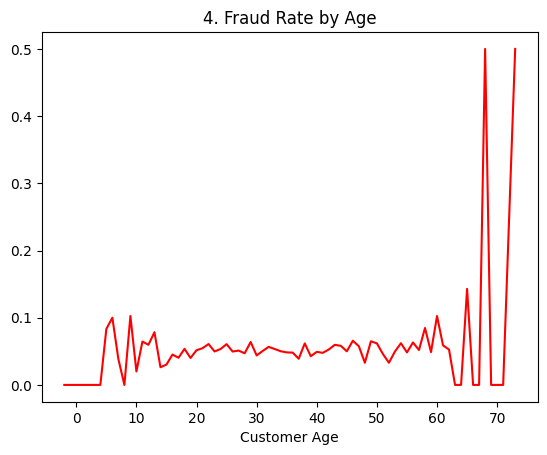

In [ ]:
fraud_by_age = df.groupby("Customer Age")["Is Fraudulent"].mean()
sns.lineplot(x=fraud_by_age.index, y=fraud_by_age.values, color="red")
plt.title("4. Fraud Rate by Age")

Text(0.5, 1.0, '6. Fraud Rate by Device')

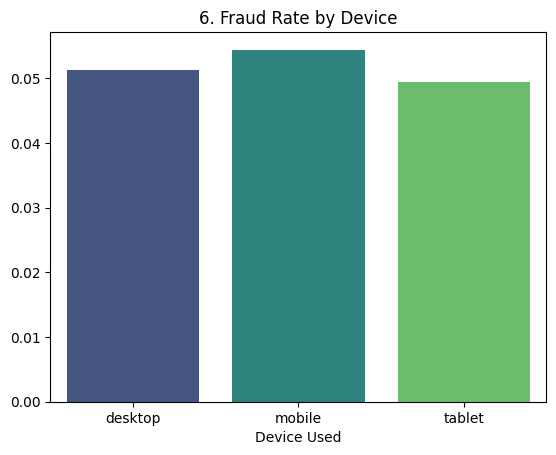

In [ ]:
fraud_by_device = df.groupby("Device Used")["Is Fraudulent"].mean()
sns.barplot(x=fraud_by_device.index, y=fraud_by_device.values, palette="viridis")
plt.title("6. Fraud Rate by Device")

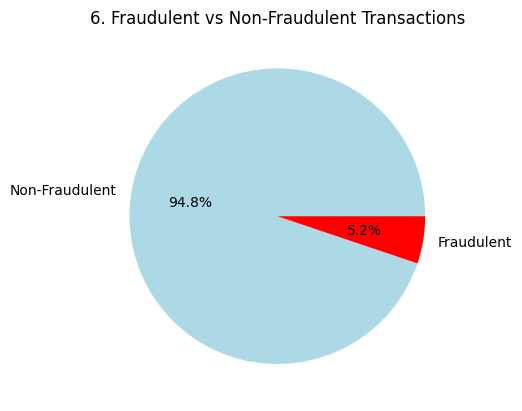

In [ ]:
plt.pie(x=df["Is Fraudulent"].value_counts(), labels=["Non-Fraudulent", "Fraudulent"], autopct="%1.1f%%", colors=["lightblue", "red"])
plt.title("6. Fraudulent vs Non-Fraudulent Transactions")
plt.show()

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
home & garden,4786
electronics,4748
toys & games,4730
clothing,4699
health & beauty,4671


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Device_Used']=le.fit_transform(df['Device Used'])   # 0 FOR DEKSTOP,1 FOR MOBILE,2 FOR TABLET
df['Payment_Method']=le.fit_transform(df['Payment Method']) # 0 FOR PAYPAL,1 FOR ,2 FOR CREDIT CARD,3 FOR DEBIT CARD
df['Product_Category']=le.fit_transform(df['Product Category'])# 0 FOR CLOTHING,1 FOR ELECTRONICS,2 FOR HEALTH & BEAUTY ,3 FOR HOME & GARDEN ,4 FOR TOYS AND GAMES
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Device_Used,Payment_Method,Product_Category
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23,0,0,1
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0,2,2,1
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8,0,3,4
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20,1,2,1
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16,2,0,4
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17,0,2,0
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23,2,1,2
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11,1,3,3


In [ ]:
x=df[['Account Age Days','Transaction Amount','Device_Used','Payment_Method','Product_Category','Quantity','Customer Age','Transaction Hour']]
y=df[['Is Fraudulent']]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
}
results={}
for model_name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  results[model_name]=accuracy
  print(f"{model_name} Accuracy: {accuracy}")
  classification_report_str = classification_report(y_test, y_pred)
  print(classification_report_str)

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Logistic Regression Accuracy: 0.9528242013962344
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4478
           1       0.91      0.12      0.21       249

    accuracy                           0.95      4727
   macro avg       0.93      0.56      0.59      4727
weighted avg       0.95      0.95      0.94      4727

Random Forest Accuracy: 0.9513433467315422
              precision    recall  f1-score   support

           0       0.96      1.00      0.97      4478
           1       0.66      0.16      0.25       249

    accuracy                           0.95      4727
   macro avg       0.81      0.58      0.61      4727
weighted avg       0.94      0.95      0.94      4727

SVM Accuracy: 0.9521895493970806
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4478
           1       0.93      0.10      0.18       249

    accuracy                           0.95      4727
   

In [ ]:
 def user_input():
    Account_Age_Days = float(input("Enter the Account Age Days: "))
    Transaction_Amount = float(input("Enter the Transaction Amount: "))
    Device_Used = float(input("Enter the no, which device is used(0 -desktop, 2 -tablet, 1 -mobile)"))
    Payment_Method = float(input("Enter the no, which Payment method used(0 -Paypal, 2 -credit card, 3 -debit card)"))
    Product_Category = float(input("Enter the no, for product Category(3 -home & garden, 1 -electronics, 4 -toys & games,0 -clothing, 2 -health & beauty)"))
    Quantity = float(input("Enter the no of Qunatity: "))
    Customer_Age = float(input("Enter the Customer Age: "))
    Transaction_Hour = float(input("Enter the Transaction Hour: "))

    # Create a DataFrame with User Input and Column Names of Features
    user_data = pd.DataFrame([[Account_Age_Days,Transaction_Amount,Device_Used,Payment_Method,Product_Category,Quantity,Customer_Age,Transaction_Hour]], columns=['Account Age Days','Transaction Amount','Device_Used','Payment_Method','Product_Category','Quantity','Customer Age','Transaction Hour'])
    user_data = sc.transform(user_data)
    # Predict using the Linear Regression Model
    prediction = best_model.predict(user_data)

    # Print the Prediction Result
    print()
    if(prediction[0]==0):
      print("✅ Non Fraudulent")
    else:
      print("❗Fraudulent")

In [ ]:
user_input()

Enter the Account Age Days: 120
Enter the Transaction Amount: 254
Enter the no, which device is used(0 -desktop, 2 -tablet, 1 -mobile)1
Enter the no, which Payment method used(0 -Paypal, 2 -credit card, 3 -debit card)3
Enter the no, for product Category(3 -home & garden, 1 -electronics, 4 -toys & games,0 -clothing, 2 -health & beauty)1
Enter the no of Qunatity: 2
Enter the Customer Age: 36
Enter the Transaction Hour: 5

✅ Non Fraudulent
